In [3]:
import gwpy
print(gwpy.__version__)

2.1.3


In [4]:
from gwosc.datasets import event_gps
gps = event_gps('GW190412')
print(gps)

1239082262.1


In [31]:
from gwosc.datasets import event_gps
gps = event_gps('GW150914')
print(gps)

1126259462.4


In [34]:
segment15 = (int(gps)-512,int(gps)+512)
print(segment15)

(1126258950, 1126259974)


In [36]:
from gwpy.timeseries import TimeSeries
ldata = TimeSeries.fetch_open_data('L1', *segment15, verbose=True)
print(ldata)

Fetched 1 URLs from www.gw-openscience.org for [1126258950 .. 1126259974))
Reading data... [Done]
TimeSeries([-1.35583146e-18, -1.35451165e-18, -1.38088351e-18,
            ..., -1.03338605e-18, -1.02402094e-18,
            -1.01089797e-18]
           unit: dimensionless,
           t0: 1126258950.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


In [38]:
from scipy.signal import get_window
window = get_window('hann', ldata.size)
lwin = ldata * window

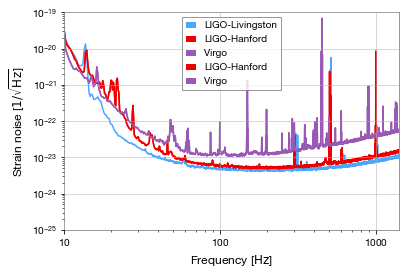

In [39]:
ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(1e-25, 1e-19)
plot

Fetched 1 URLs from www.gw-openscience.org for [1126258950 .. 1126259974))
Reading data... [Done]


/opt/anaconda3/lib/python3.8/site-packages/gwpy/plot/plot.py:279: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


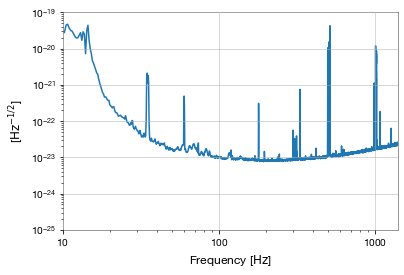

In [40]:
ldata2 = TimeSeries.fetch_open_data('L1', int(gps)-512, int(gps)+512, verbose=True)
lasd2 = ldata2.asd(fftlength=4, method="median")
plot = lasd2.plot()
ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(1e-25, 1e-19)
plot.show(warn=False)

In [5]:
segment = (int(gps)-5, int(gps)+5)
print(segment)

(1239082257, 1239082267)


# ########----------L1---------------____________________+++++++++++=======

In [6]:
from gwpy.timeseries import TimeSeries
ldata = TimeSeries.fetch_open_data('L1', *segment, verbose=True)
print(ldata)

Fetched 1 URLs from www.gw-openscience.org for [1239082257 .. 1239082267))
Reading data... [Done]
TimeSeries([-8.42597565e-19, -8.52437103e-19, -8.60738804e-19,
            ...,  1.38850270e-19,  1.37760541e-19,
             1.38094202e-19]
           unit: dimensionless,
           t0: 1239082257.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


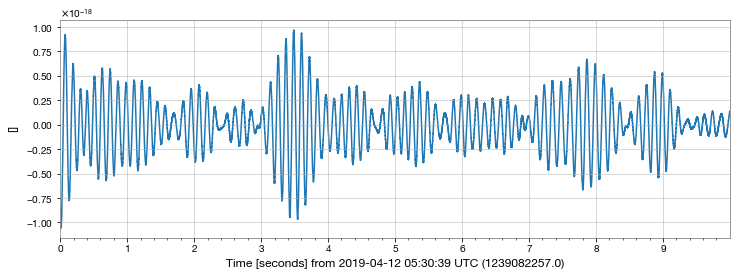

In [7]:
%matplotlib inline
plot = ldata.plot()

In [12]:
fft = ldata.fft()
print(fft)

FrequencySeries([-1.45894410e-21+0.00000000e+00j,
                 -2.91834926e-21-4.52905657e-23j,
                 -2.91973330e-21-9.06202944e-23j, ...,
                 -2.38723982e-23+4.67871178e-26j,
                 -2.38345362e-23+1.80394058e-26j,
                 -2.38457175e-23+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.1 Hz,
                epoch: 1239082257.0,
                name: Strain,
                channel: None)


In [16]:
from scipy.signal import get_window
window = get_window('hann', ldata.size)
lwin = ldata * window

/opt/anaconda3/lib/python3.8/site-packages/gwpy/plot/plot.py:279: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


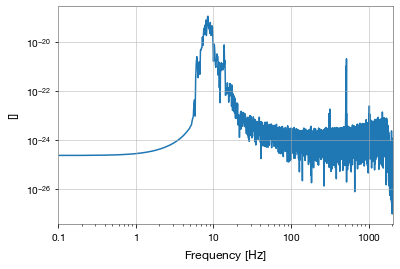

In [17]:
fftamp = lwin.fft().abs()
plot = fftamp.plot(xscale="log", yscale="log")
plot.show(warn=False)

/opt/anaconda3/lib/python3.8/site-packages/gwpy/plot/plot.py:279: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


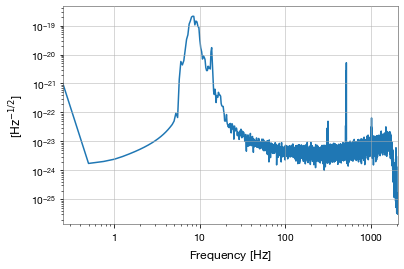

In [20]:
asd = ldata.asd(fftlength=4, method="median")
plot = asd.plot()
plot.show(warn=False)

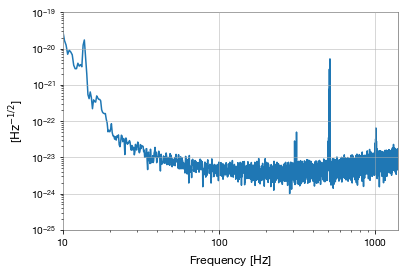

In [23]:
ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(1e-25, 1e-19)
plot

Fetched 1 URLs from www.gw-openscience.org for [1239081750 .. 1239082774))
Reading data... [Done]


/opt/anaconda3/lib/python3.8/site-packages/gwpy/plot/plot.py:279: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


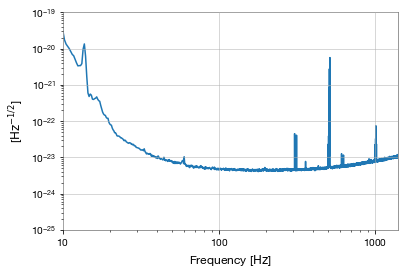

In [26]:
ldata2 = TimeSeries.fetch_open_data('L1', int(gps)-512, int(gps)+512, verbose=True)
lasd2 = ldata2.asd(fftlength=4, method="median")
plot = lasd2.plot()
ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(1e-25, 1e-19)
plot.show(warn=False)

Fetched 1 URLs from www.gw-openscience.org for [1239081750 .. 1239082774))
Reading data... [Done]
Fetched 1 URLs from www.gw-openscience.org for [1239081750 .. 1239082774))
Reading data... [Done]


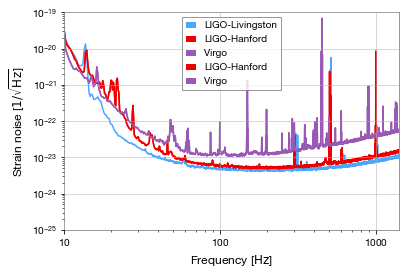

In [30]:
# get Hanford data
hdata2 = TimeSeries.fetch_open_data('H1', int(gps)-512, int(gps)+512, verbose=True)
hasd2 = hdata2.asd(fftlength=4, method="median")

# get Virgo data
vdata2 = TimeSeries.fetch_open_data('V1', int(gps)-512, int(gps)+512, verbose=True)
vasd2 = vdata2.asd(fftlength=4, method="median")

# and plot using standard colours
ax.plot(hasd2, label='LIGO-Hanford', color='gwpy:ligo-hanford')
ax.plot(vasd2, label='Virgo', color='gwpy:virgo')

# update the Livingston line to use standard colour, and have a label
lline = ax.lines[0]
lline.set_color('gwpy:ligo-livingston')  # change colour of Livingston data
lline.set_label('LIGO-Livingston')

ax.set_ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
ax.legend()
plot

# V1 ###########################________________---------------------------------------------------------------

In [8]:
from gwpy.timeseries import TimeSeries
vdata = TimeSeries.fetch_open_data('V1', *segment, verbose=True)
print(vdata)

Fetched 1 URLs from www.gw-openscience.org for [1239082257 .. 1239082267))
Reading data... [Done]
TimeSeries([-4.14628280e-20, -2.16068322e-20,  8.49382876e-21,
            ...,  1.97669207e-20, -7.11263366e-21,
            -2.44333694e-20]
           unit: dimensionless,
           t0: 1239082257.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


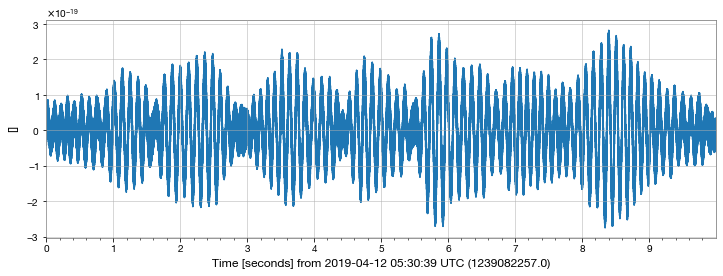

In [9]:
%matplotlib inline
plot = vdata.plot()

# ---------------------H1---------------------================================

In [10]:
from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data('H1', *segment, verbose=True)
print(hdata)

Fetched 1 URLs from www.gw-openscience.org for [1239082257 .. 1239082267))
Reading data... [Done]
TimeSeries([-4.95786471e-20, -4.54534103e-20, -3.15192804e-20,
            ...,  3.03308454e-19,  3.06989654e-19,
             3.06153067e-19]
           unit: dimensionless,
           t0: 1239082257.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


In [25]:
from scipy.signal import get_window
window = get_window('hann', hdata.size)
hwin = hdata * window

/opt/anaconda3/lib/python3.8/site-packages/gwpy/plot/plot.py:279: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


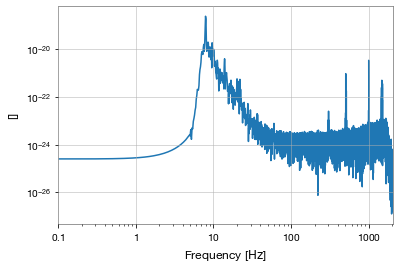

In [19]:
fftamp = lwin.fft().abs()
plot = fftamp.plot(xscale="log", yscale="log")
plot.show(warn=False)

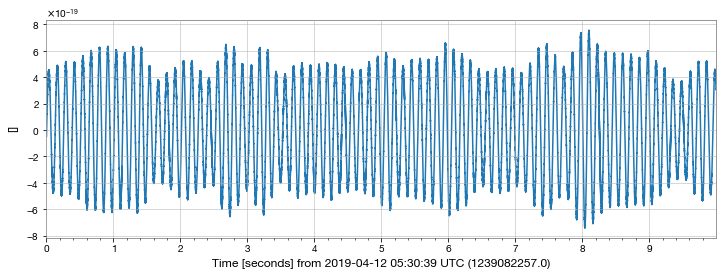

In [11]:
%matplotlib inline
plot = hdata.plot()

(10, 2000)

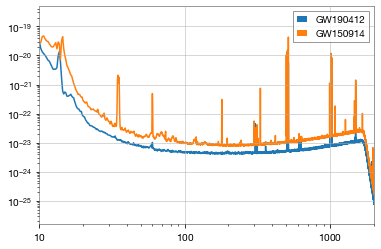

In [41]:
from gwpy.timeseries import TimeSeries
from gwosc.datasets import event_gps
import pylab as plt

gps = event_gps('GW190412')
ldata = TimeSeries.fetch_open_data('L1', int(gps)-512, int(gps)+512, cache=True)
lasd = ldata.asd(fftlength=4, method="median")

gps2 = event_gps('GW150914')
ldata2 = TimeSeries.fetch_open_data('L1', int(gps2)-512, int(gps2)+512, cache=True)
lasd2 = ldata2.asd(fftlength=4, method="median")

plt.loglog(lasd, label = 'GW190412')
plt.loglog(lasd2,label = 'GW150914')
plt.legend()
plt.xlim(10,2000)